<a href="https://colab.research.google.com/github/UCD-Physics/Python-HowTos/blob/main/Error_Bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Error Bars

Note: please read the HowTo on Matplotlib Pyplot for background on plotting.

All experimental measurements have some degree of uncertainty - often referred to as an *error*. 

When we plot experimentally measured data points we should include the errors by plotting error bars and not connect the points with lines. Any overlaid theory should be plotted as lines with no points.

This *How To* provides a basic guide the PyPlot `errorbar()` function. For full documentation see [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html). 


## Preliminaries

Import pyplot and set default font and figure sizes:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.bbox'] = 'tight'  

## Load a sample data set

In [ ]:
# run this cell to download data file!

!wget https://raw.githubusercontent.com/UCD-Physics/Python-HowTos/main/data_with_errors.txt

In [4]:
V, I_mA, Ierr_mA = np.loadtxt("data_with_errors.txt", unpack=True)

## Example: error bars in y

Please note: make sure to specify "." (or another symbol and no line style) as by default lines will be plotted but no markers at the points.

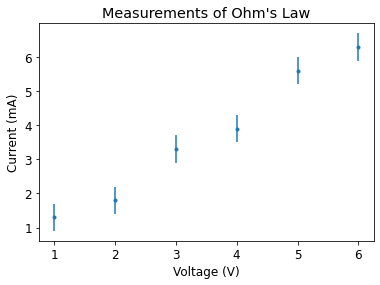

In [8]:
plt.errorbar(V, I_mA, Ierr_mA, fmt=".");

plt.title("Measurements of Ohm's Law")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (mA)");

To add caps to the ends of the errorbars use the `capsize` option. <br>
Note: this can be set as a default for the entire notebook in rcParams with, for example:
```python
plt.rcParams['errorbar.capsize'] = 3
```

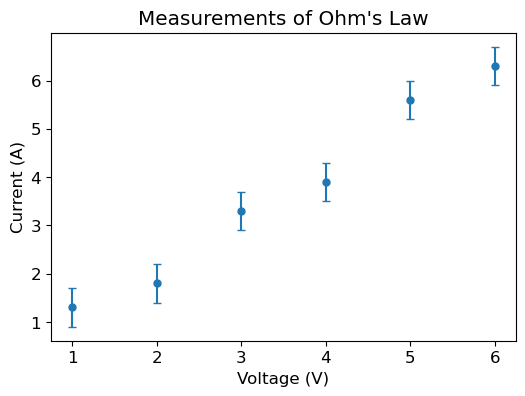

In [60]:
plt.errorbar(V, I_mA, Ierr_mA, capsize=3, fmt="o", markersize=5)

plt.title("Measurements of Ohm's Law")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)");

## Overlay theory

Let's assume that the the Ohm's Law experiment was conducted with a 1 k$\Omega$ resistor and we wish to overlay the expected curve.

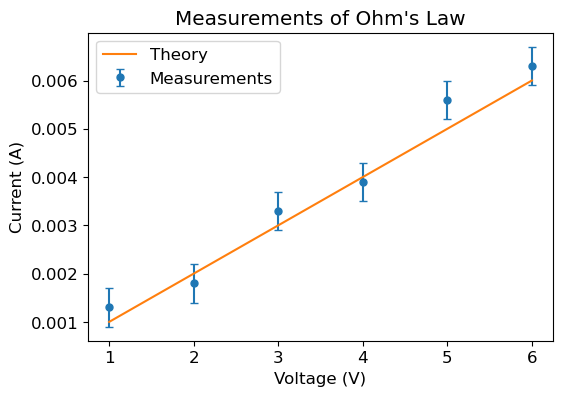

In [67]:
I = I_mA * 1e-3   # convert to amps
Ierr = Ierr_mA * 1e-3

R = 1_000

I_theory = V / R

plt.errorbar(V, I, Ierr, capsize=3, fmt="o", markersize=5, label="Measurements")
plt.plot(V, I_theory, label="Theory")

plt.title("Measurements of Ohm's Law")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)");

plt.legend();

## Errorbars in both dimensions

On rare occasions errobars may be present on both dimensions.

For example, say that the voltage measurement had an uncertainty of 0.1 V. 

We can plot errors in both dimensions...

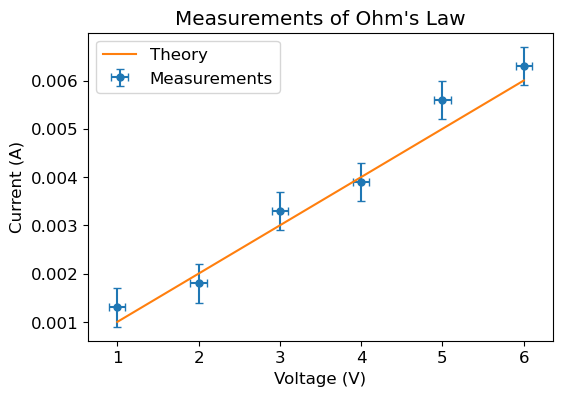

In [73]:
Verr = np.ones_like(V) * 0.1
# np.one_like(V) make an array of 1s the same dimension as V

plt.errorbar(
    V, I, xerr=Verr, yerr=Ierr, capsize=3, fmt="o", markersize=5, label="Measurements"
)
plt.plot(V, I_theory, label="Theory")

plt.title("Measurements of Ohm's Law")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")

plt.legend();